# Grouping Spotify genres into similar clusters 

***Clustering - Mini-Project 3***

---

Name: Ahmed Bahaa

ID: 49-0354

Tutorial: T02






## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/music_genres.csv')
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


# 1-Data Cleaning

In [5]:
# replacing the empty brackets value in the genre column with NaN in order to fill it with the mode of the genre column since it is a categorical column
df['genres']=df['genres'].replace(to_replace="[]", value=np.NAN)

In [6]:
#dropping null values that exist in the genres column
df=df.dropna(subset=['genres'])

In [7]:
# null values have been removed
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


# 2-Data Visualization

1-What are the 5 most popular music genres?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'basshall'),
  Text(1, 0, 'south african house'),
  Text(2, 0, 'trap venezolano'),
  Text(3, 0, 'turkish edm'),
  Text(4, 0, 'alberta hip hop')])

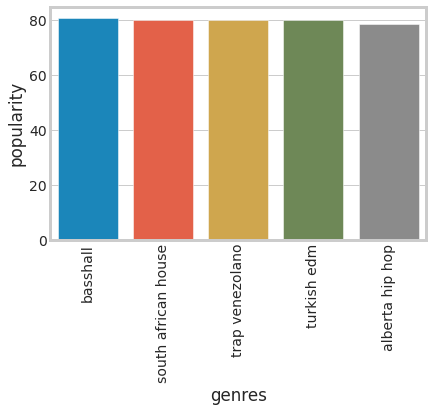

In [8]:
#creating new dataframe with the 5 largest genres with popularity that are grouped by the popularity
dfhigh=df.nlargest(5,"popularity")
ax=sns.barplot(data=dfhigh,x="genres", y="popularity")
plt.xticks(rotation=90)



In [9]:
# we will sort the 'Popularity' column in descending order to find the 5 most popular genres
df.sort_values(by='popularity',ascending=False)


,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.818000,169799.166667,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2533,1,south african house,0.043833,0.847000,311854.333333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.877000,231848.000000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
2778,0,turkish edm,0.008290,0.698000,186700.000000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
536,0,chinese electropop,0.002570,0.660000,217088.000000,0.787000,0.000000,0.323000,-4.592000,0.032000,142.018000,0.199000,78.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,0,minimal melodic techno,0.027500,0.531000,302980.000000,0.898000,0.874000,0.097600,-9.719000,0.032200,123.003000,0.049500,0.000000,8
284,0,birdsong,0.680000,0.296667,136135.000000,0.980833,0.914333,0.799833,-20.510833,0.155717,99.062667,0.023887,0.000000,7
1777,1,middle east hip hop,0.780000,0.351000,493796.000000,0.606000,0.000000,0.535000,-0.910000,0.031100,87.889000,0.513000,0.000000,0
739,1,cypriot pop,0.947111,0.389667,196995.666667,0.588889,0.332146,0.216533,-8.491556,0.038000,101.998778,0.751111,0.000000,5


The 5 most popular genres are: basshall , turkish edm, south african house, trap venezolano, alberta hip hop

2-What factors affect the Popularity of the song ? (Mention the biggest 2 factors, with interpretation)


In [10]:
#visualizing the correlation in the whole dataset and defining it in a variable named corr
corr=df.corr()
corr

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
mode,1.000000,0.077240,-0.071234,-0.053170,-0.080268,-0.012659,-0.002692,-0.063660,-0.059175,-0.042880,-0.010274,-0.031067,-0.060159
acousticness,0.077240,1.000000,-0.325010,-0.014024,-0.868257,0.273774,-0.076653,-0.737279,-0.086229,-0.397669,-0.178256,-0.458546,-0.078907
danceability,-0.071234,-0.325010,1.000000,-0.160638,0.299788,-0.383103,-0.055143,0.453064,0.242061,0.082864,0.652549,0.218019,0.029557
duration_ms,-0.053170,-0.014024,-0.160638,1.000000,-0.048202,0.229421,0.018643,-0.137600,0.033247,-0.046865,-0.257512,-0.071111,-0.029289
energy,-0.080268,-0.868257,0.299788,-0.048202,1.000000,-0.324964,0.168303,0.848966,0.119862,0.430789,0.305207,0.337657,0.097237
instrumentalness,-0.012659,0.273774,-0.383103,0.229421,-0.324964,1.000000,-0.050614,-0.537682,-0.196764,-0.201670,-0.424091,-0.265516,-0.069315
liveness,-0.002692,-0.076653,-0.055143,0.018643,0.168303,-0.050614,1.000000,0.123981,0.190112,0.002318,0.000720,-0.094092,0.007279
loudness,-0.063660,-0.737279,0.453064,-0.137600,0.848966,-0.537682,0.123981,1.000000,0.095334,0.407962,0.376596,0.344315,0.083029
speechiness,-0.059175,-0.086229,0.242061,0.033247,0.119862,-0.196764,0.190112,0.095334,1.000000,0.001482,0.092671,-0.045112,0.022294
tempo,-0.042880,-0.397669,0.082864,-0.046865,0.430789,-0.201670,0.002318,0.407962,0.001482,1.000000,0.139605,0.146617,0.081648


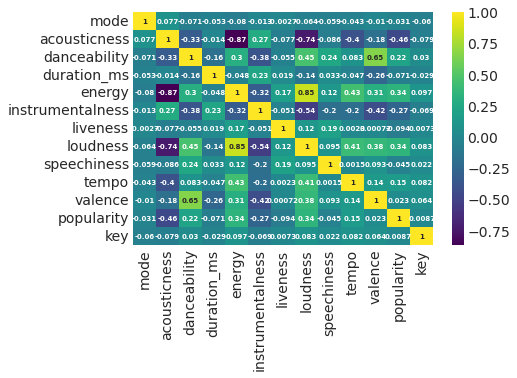

In [11]:
#heatmap to visualize the correlations where the correlation with popularity and other features can be clearly seen
sns.heatmap(corr, cmap='viridis', annot = True,
            annot_kws={'fontsize':7, 'fontweight':'bold'});

In [12]:
#see the correlation of each feature with popularity
corr['popularity'].sort_values(ascending=False, key=lambda x: x.abs())

popularity          1.000000
acousticness       -0.458546
loudness            0.344315
energy              0.337657
instrumentalness   -0.265516
danceability        0.218019
tempo               0.146617
liveness           -0.094092
duration_ms        -0.071111
speechiness        -0.045112
mode               -0.031067
valence             0.023117
key                 0.008700
Name: popularity, dtype: float64

the most correlated variables or the factors that affect popularity are acousticness and loudness as the acousticeness is -0.458 which is the highest correlated value with popularity and it is a negatively correlated one. Also, loudness is 0.344 which is the second highest correlated variable with popularity and it is a positively correlated one.

3-Which genre has the highest energy and which has the lowest?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'australian ska'),
  Text(1, 0, 'tennessee metal'),
  Text(2, 0, 'nederlandse hardstyle'),
  Text(3, 0, 'brazilian ska'),
  Text(4, 0, 'dutch death metal')])

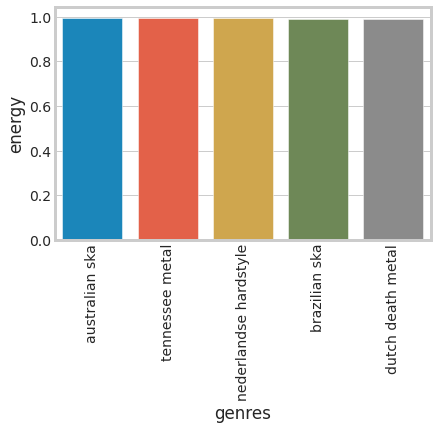

In [13]:
#creating a new dataframe that is composed of the 5 largest genres with energy that are grouped by the energy
dfhigh=df.nlargest(5,"energy")
ax=sns.barplot(data=dfhigh,x="genres", y="energy")
plt.xticks(rotation=90)

In [14]:
# We will sort the 'energy' column in descending order to find the genre with the highest energy, and it is australian ska
df.sort_values(by='energy',ascending=False)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
175,0,australian ska,0.000096,0.312667,211724.666667,0.994667,0.000183,0.1561,-4.3560,0.158667,148.061,0.228900,43.333333,9
2706,1,tennessee metal,0.000891,0.372000,264013.333333,0.994333,0.040620,0.1780,-4.6210,0.192667,122.180,0.105967,46.000000,11
1897,0,nederlandse hardstyle,0.076200,0.341000,237818.000000,0.994000,0.000000,0.3520,0.0600,0.374000,157.607,0.220000,0.000000,1
348,0,brazilian ska,0.500000,0.320000,172176.000000,0.991000,0.000004,0.2260,-7.0470,0.220000,167.532,0.545000,13.000000,9
913,1,dutch death metal,0.000040,0.306000,279093.000000,0.989000,0.000410,0.2700,-5.0870,0.109000,103.006,0.134000,38.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1,medieval,0.995000,0.533000,136072.000000,0.004440,0.796000,0.1110,-29.4720,0.060400,80.919,0.176000,0.000000,8
2476,1,singing bowl,0.916000,0.056900,554747.000000,0.004130,0.971000,0.1200,-30.6840,0.057500,56.436,0.024500,45.000000,3
1611,1,korean classical piano,0.993500,0.379500,135913.500000,0.003950,0.946500,0.0986,-37.6195,0.052450,68.906,0.349500,49.000000,8
328,1,brain waves,0.993500,0.439500,122174.500000,0.001002,0.802500,0.1090,-41.8250,0.079500,68.144,0.184100,59.000000,3


 australian ska is the genre with the highest energy

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'binaural'),
  Text(1, 0, 'brain waves'),
  Text(2, 0, 'korean classical piano'),
  Text(3, 0, 'singing bowl'),
  Text(4, 0, 'medieval')])

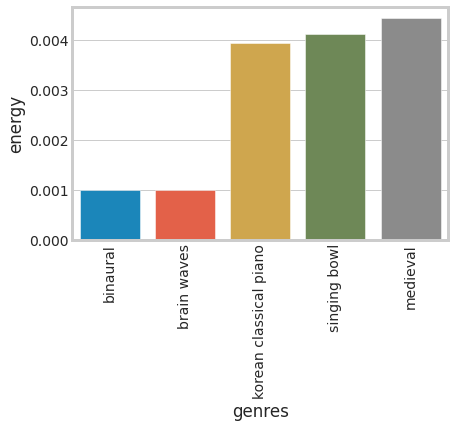

In [15]:
#creating a new dataframe that is composed of the 5 smallest genres with energy that are grouped by the energy
dfhigh=df.nsmallest(5,"energy")
ax=sns.barplot(data=dfhigh,x="genres", y="energy")
plt.xticks(rotation=90)

In [16]:
#We will sort the 'energy' column in ascending order to find the genre with the lowest energy, and it is brain waves
df.sort_values(by='energy', axis=0, ascending=True)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
328,1,brain waves,0.993500,0.439500,122174.500000,0.001002,0.802500,0.1090,-41.8250,0.079500,68.144,0.184100,59.000000,3
283,1,binaural,0.993500,0.439500,122174.500000,0.001002,0.802500,0.1090,-41.8250,0.079500,68.144,0.184100,59.000000,3
1611,1,korean classical piano,0.993500,0.379500,135913.500000,0.003950,0.946500,0.0986,-37.6195,0.052450,68.906,0.349500,49.000000,8
2476,1,singing bowl,0.916000,0.056900,554747.000000,0.004130,0.971000,0.1200,-30.6840,0.057500,56.436,0.024500,45.000000,3
1723,1,medieval,0.995000,0.533000,136072.000000,0.004440,0.796000,0.1110,-29.4720,0.060400,80.919,0.176000,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,dutch death metal,0.000040,0.306000,279093.000000,0.989000,0.000410,0.2700,-5.0870,0.109000,103.006,0.134000,38.000000,2
348,0,brazilian ska,0.500000,0.320000,172176.000000,0.991000,0.000004,0.2260,-7.0470,0.220000,167.532,0.545000,13.000000,9
1897,0,nederlandse hardstyle,0.076200,0.341000,237818.000000,0.994000,0.000000,0.3520,0.0600,0.374000,157.607,0.220000,0.000000,1
2706,1,tennessee metal,0.000891,0.372000,264013.333333,0.994333,0.040620,0.1780,-4.6210,0.192667,122.180,0.105967,46.000000,11


brain waves and binaural are the genres with the smallest energy

4-What are the most correlated pairs of attributes ? (Mention 2 pairs, with interpretation)

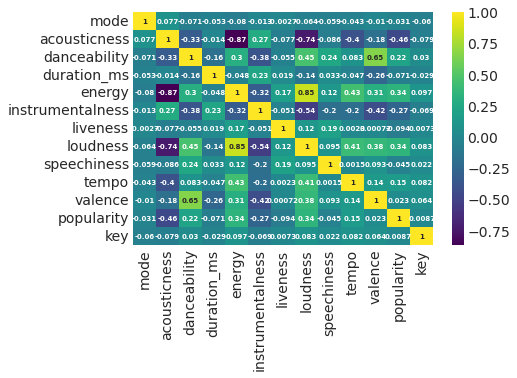

In [17]:
# Heatmap to visualize the most correlated pairs of attributes. Here they are 'acousticness' with 'energy' with a value of -0.87 followed by 
#'energy' with 'loudness' with a value of 0.85
sns.heatmap(corr, cmap='viridis', annot = True,
            annot_kws={'fontsize':7, 'fontweight':'bold'});

The most correlated pairs of attributes are 'acousticness' with 'energy' with a value of -0.87 followed by 'energy' with 'loudness' with a value of 0.85.





# 3-Data Preparation

In [18]:
#Picking the columns to cluster
X = df[['mode', 'acousticness' , 'danceability' , 'duration_ms' , 'energy' , 'instrumentalness' , 'liveness' , 'loudness' , 'speechiness', 'tempo' , 'valence', 'popularity', 'key']].copy()
X.head()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
4,1,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


In [19]:
#Z-Score Normalization
from sklearn.preprocessing import StandardScaler 
scaled_data = StandardScaler().fit_transform(X)
scaled_data

array([[ 0.44757469,  1.80834218, -2.48432022, ..., -1.92725355,
        -0.72213868,  0.01828198],
       [ 0.44757469,  0.2928222 , -1.57868449, ..., -1.34273793,
         0.75093152, -0.2786254 ],
       [ 0.44757469,  1.12859655,  1.16023582, ...,  2.38955698,
         0.48219574,  0.31518936],
       ...,
       [ 0.44757469, -0.43129108,  1.405072  , ...,  1.64191432,
         0.40257032, -0.2786254 ],
       [-2.23426397,  1.85108692,  1.1182007 , ...,  1.22019541,
        -2.38431924,  0.31518936],
       [ 0.44757469,  0.06218354,  0.61206723, ...,  1.56477877,
        -0.57710667,  0.31518936]])

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# As it's difficult to visualise clusters when the data is high-dimensional - we'll use
# boxplots to help us see how the clusters are grouping the samples

df["cluster"] = cluster_labels

# 4-Modelling 

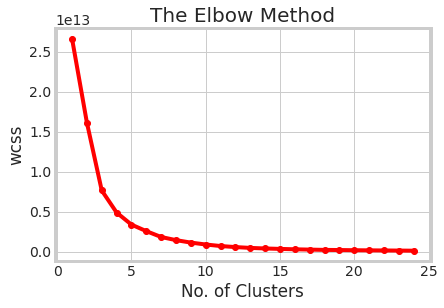

In [21]:
#Elbow method to choose the number of clusters (K)
from sklearn.cluster import KMeans
wcss = []
#we chose 25 as the upper limit since there seems to be many clusters present in the data
for i in range(1, 25):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 25), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**5-Clustering**

In [22]:
#Now that we've decided on which k to use, we can apply the K-Means algorithm to our data to cluster them into k groups (10 groups)
km = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(X)

# Get the cluster labels for the fitted data
labels = km.labels_
labels

array([7, 8, 7, ..., 4, 3, 7], dtype=int32)

we chose K which is the parameter used for clustering to have a value of 10 as we wanted to get an optimum value between the WCSS and the number of clusters so from the elbow method as seen in the diagram any point on the curve in the part that looks like an elbow is the optimum value to be used as K. At a certain point, increasing the number of clusters causes diminishing returns in clustering performance beacuse the clusters are already well-grouped. So, the number of clusters at which the curve bends, i.e. its 'elbow point', is chosen.

6-Cluster Interpretation

In [23]:
# We'll assign the cluster labels to a new column called 'cluster' in our original dataframe
df['cluster'] = labels


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df.groupby('cluster').describe()

mode                                              acousticness  \
         count      mean       std  min  25%  50%  75%  max        count   
cluster                                                                    
0        955.0  0.855497  0.351783  0.0  1.0  1.0  1.0  1.0        955.0   
1         90.0  0.688889  0.465542  0.0  0.0  1.0  1.0  1.0         90.0   
2          3.0  0.666667  0.577350  0.0  0.5  1.0  1.0  1.0          3.0   
3        757.0  0.841480  0.365470  0.0  1.0  1.0  1.0  1.0        757.0   
4        563.0  0.840142  0.366800  0.0  1.0  1.0  1.0  1.0        563.0   
5         23.0  0.782609  0.421741  0.0  1.0  1.0  1.0  1.0         23.0   
6          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0          1.0   
7        285.0  0.810526  0.392574  0.0  1.0  1.0  1.0  1.0        285.0   
8          2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0          2.0   
9        293.0  0.798635  0.401706  0.0  1.0  1.0  1.0  1.0        293.0   

                                                                               \
             mean       std       min       25%       50%       75%       max   
cluster                                                                         
0        0.327416  0.277573  0.000005  0.105863  0.245956  0.489714  0.993400   
1        0.497162  0.383203  0.000067  0.087174  0.559594  0.903035  0.988009   
2        0.938000  0.043301  0.913000  0.913000  0.913000  0.950500  0.988000   
3        0.448924  0.312433  0.000096  0.170183  0.405000  0.714663  0.995000   
4        0.323662  0.301044  0.000003  0.067785  0.233422  0.527105  0.994000   
5        0.469365  0.383246  0.000023  0.060390  0.480250  0.827875  0.974000   
6        0.681000       NaN  0.681000  0.681000  0.681000  0.681000  0.681000   
7        0.576034  0.335781  0.000007  0.267000  0.652925  0.880600  0.996000   
8        0.633890  0.196731  0.494780  0.564335  0.633890  0.703445  0.773000   
9        0.454014  0.348165  0.000027  0.116300  0.395212  0.797900  0.991786   

        danceability                                                    \
               count      mean       std       min       25%       50%   
cluster                                                                  
0              955.0  0.560465  0.133571  0.150270  0.480024  0.559751   
1               90.0  0.459867  0.192480  0.140000  0.317267  0.410535   
2                3.0  0.494333  0.036950  0.473000  0.473000  0.473000   
3              757.0  0.555353  0.135146  0.074615  0.482221  0.563000   
4              563.0  0.522757  0.149847  0.137000  0.407942  0.531000   
5               23.0  0.404867  0.226621  0.056900  0.212500  0.316000   
6                1.0  0.130033       NaN  0.130033  0.130033  0.130033   
7              285.0  0.533659  0.162829  0.082567  0.430000  0.535173   
8                2.0  0.222292  0.108953  0.145250  0.183771  0.222292   
9              293.0  0.483685  0.175661  0.123000  0.332944  0.478000   

                            duration_ms                               \
              75%       max       count          mean            std   
cluster                                                                
0        0.661500  0.929000       955.0  2.397163e+05   11554.880883   
1        0.616346  0.902000        90.0  4.425993e+05   33619.812270   
2        0.505000  0.537000         3.0  1.571094e+06   88171.201060   
3        0.651333  0.896000       757.0  2.007589e+05   12545.018989   
4        0.634232  0.920000       563.0  2.845051e+05   14988.160565   
5        0.573000  0.813000        23.0  5.959666e+05   66742.935334   
6        0.130033  0.130033         1.0  2.382587e+06            NaN   
7        0.659000  0.911000       285.0  1.486319e+05   25235.181216   
8        0.260812  0.299333         2.0  1.128777e+06  112980.932242   
9        0.619800  0.893000       293.0  3.474357e+05   20300.054624   

                                                                   

In [24]:
df.groupby('cluster').describe(include='object')

genres                                    
         count unique                     top freq
cluster                                           
0          955    955          abstract beats    1
1           90     90          arabic hip hop    1
2            3      3   histoire pour enfants    1
3          757    757              a cappella    1
4          563    563              acid house    1
5           23     23        baltic classical    1
6            1      1  bulgarian experimental    1
7          285    285  21st century classical    1
8            2      2                   432hz    1
9          293    293                abstract    1

In [25]:
#Displaying a random sample of genres in each cluster group (at least 5 each) 
df.groupby("cluster").sample(n=5, random_state=1, replace=True)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
115,1,argentine rock,0.233887,0.585526,2.611441e+05,0.627037,0.054236,0.204374,-9.387356,0.048354,116.485540,0.586626,55.633713,7,0
712,1,croatian pop,0.348858,0.561583,2.319842e+05,0.709875,0.000651,0.118250,-6.202042,0.047367,124.173167,0.544833,40.875000,7,0
2839,0,v-pop,0.366000,0.792000,2.562270e+05,0.492000,0.000007,0.179000,-10.642000,0.029800,133.802000,0.681000,41.000000,9,0
234,1,bass house,0.171067,0.740583,2.447109e+05,0.733010,0.148759,0.164830,-5.997553,0.069517,120.635423,0.476557,51.138889,5,0
2388,1,russian metal,0.029437,0.505444,2.454741e+05,0.868333,0.001152,0.295222,-5.698222,0.061344,115.792333,0.432778,40.000000,0,0
467,1,carnatic,0.900802,0.560676,4.142152e+05,0.380986,0.278689,0.231732,-10.431862,0.107564,118.859500,0.658877,7.992519,10,1
2365,0,romanian electronic,0.003010,0.811000,4.032000e+05,0.907000,0.851000,0.051700,-7.730000,0.101000,124.996000,0.766000,0.000000,11,1
289,0,black 'n' roll,0.006651,0.185667,4.161157e+05,0.912333,0.151740,0.227000,-5.176000,0.108667,140.600333,0.110567,43.333333,7,1
2596,1,streichquartett,0.961611,0.213809,4.520337e+05,0.083320,0.511683,0.138054,-22.507316,0.052058,90.377834,0.121398,30.436364,2,1
1995,0,norwegian death metal,0.006651,0.185667,4.161157e+05,0.912333,0.151740,0.227000,-5.176000,0.108667,140.600333,0.110567,43.333333,7,1


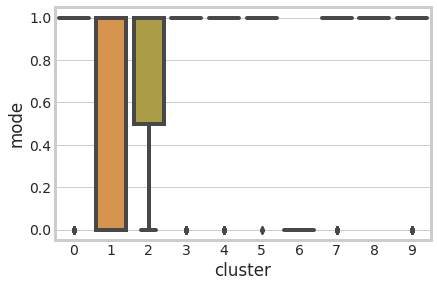

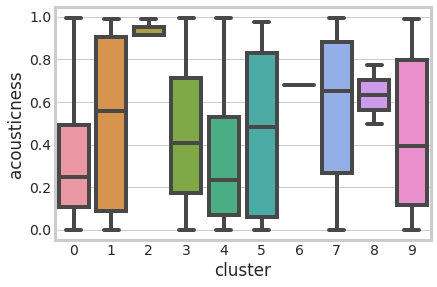

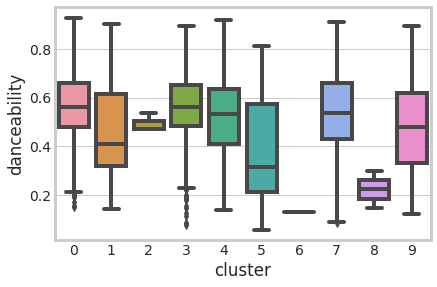

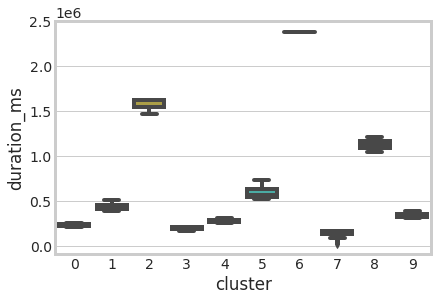

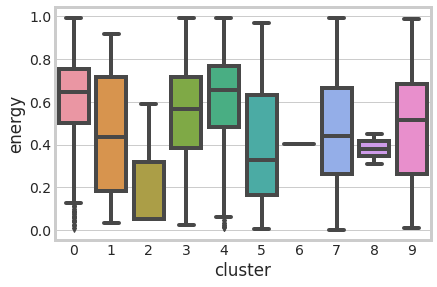

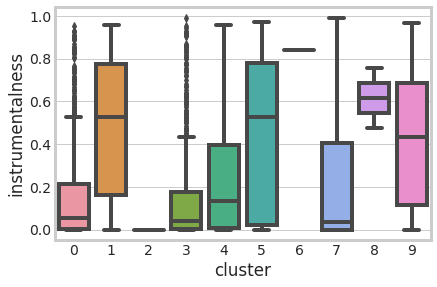

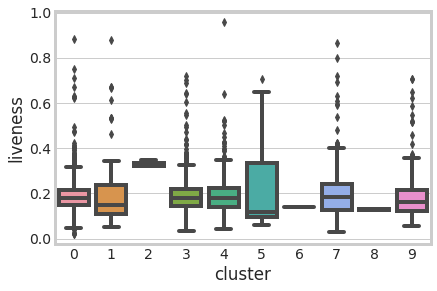

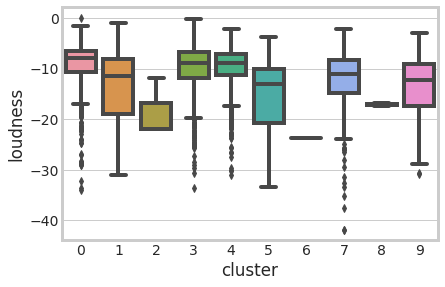

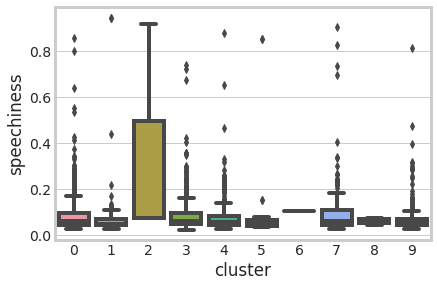

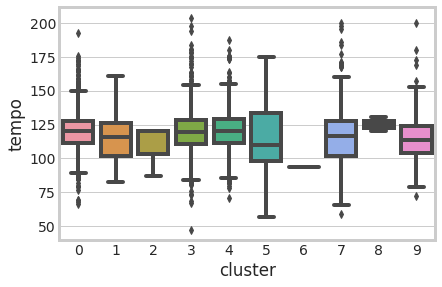

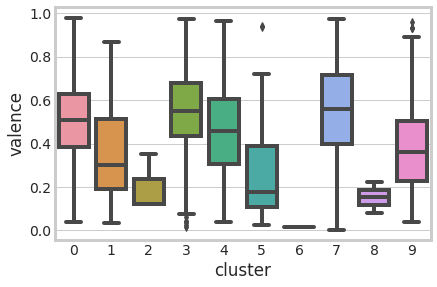

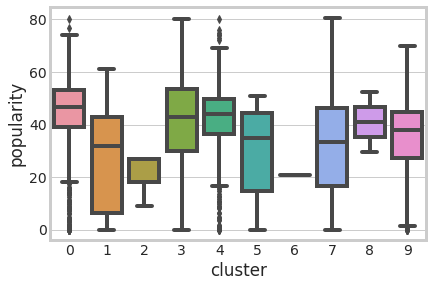

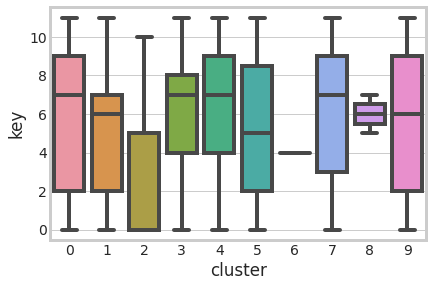

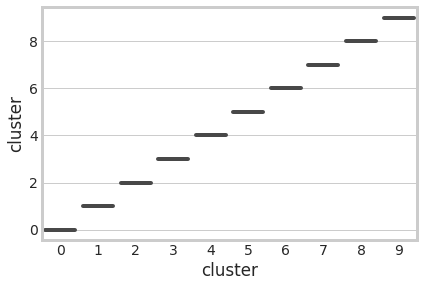

In [26]:
# Minimal code to plot a boxplot of each numerical column
for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(x='cluster', y=col, data=df)

<AxesSubplot:xlabel='cluster', ylabel='count'>

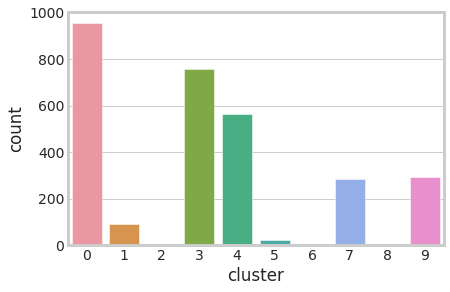

In [27]:
# Visually plotting how many points belong to each cluster 
sns.countplot(x='cluster', data=df)

Cluster #0 has a very low mode, and lowest popularity. it has 91 data points. it has the highest instrumentalness

Cluster #1 has the most number of data in it which is 934 and has high danceability about the same value as cluster 4 but has lower distribution than it, with max distribution of nearly 0.65. it is the second highest cluster with regards to energy after cluster 5. it has low intrumentalness. also, it has high loudness about -5 and has average tempo compared to the rest of the clusters

Cluster #2 has the lowest amount of data in it which is 1. has a very low mode and is the lowest. it has a very small distribution in terms of acoustiness. it has low danceability distribution. it has the highest duration. very low energy distribution. high instrumentalness but very low distribution of it. low/est tempo and valence but little distribution and the same goes for the rest of the characteristics

Cluster #3 has low amount data which is 2. has low danceability, low valence, lower than average with regards to the key and very low distribution in it compared to average

Cluster #4 highest dancebility about the same value as cluster 1 but has higher distribution than it. has the lowest duration, about the lowest cluster in instrumentalness. Has the highest valence.

Cluster #5 has the lowest acousticeness. has the highest energy. one of the lowest clusters in instrumentalness. on eof the top clusters in loudness 

Cluster #6 has low danceability, higher duration than average, second highest cluster in instrumentalness after cluster 0. has the lowest liveness. on of the lowest if not the least cluster in speechiness. has the lowest tempo

Cluster #7 has high dancebaility about the same as cluster 4 and 1. higher energy than average. has the lowest instrumentalness about the same as cluster 1. it has the highest loudness about the same as cluster 1. has the highest popularity

Cluster #8 has low data which is 3. one of the lowest clusters with regards to the mode. has the highest acouctisness. very low distribution in danceability. has very high duration. has the lowest energy. very low instrumentalness and low distribition in it. highest in liveness. low in loudness. has the highest speechiness. has low valence, low popularity. lowest in the key

Cluster #9 has high instrumentalness compared to the average, low speechiness and is the highest with regards to the key

* most clusters have the same values in the key with some exceptions mentioned above. cluster 7 has some similar characteristics to cluster 1 as explained above